# Data Analysis - covid19

* Data download
* Data wrangling
* Data plot

### Remarks:
* convert DateRep to pd date format
* set 'Date' as index

In [11]:
 import sys
 print(sys.executable)
 print(sys.version)
 print(sys.version_info)

from platform import python_version

print(python_version())


import numpy as np
import pandas as pd
import os
import datetime
import sys
#from urllib.error import URLerror
import urllib.request
from urllib.error import HTTPError
from colorama import Fore

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


/usr/bin/python3
3.8.2 (default, Apr 27 2020, 15:53:34) 
[GCC 9.3.0]
sys.version_info(major=3, minor=8, micro=2, releaselevel='final', serial=0)
3.8.2


## Requesting & preprocessing Data

1. Data Download
2. Data import
3. Data wrangling


In [12]:
# ----------------------- Download file -----------------------
# format: 
# https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-22.xlsx


def check_directory(cwd):
    return os.access(cwd, os.F_OK or os.X_OK or os.R_OK | os.W_OK) 

def check_existence(file_name):
    return os.path.isfile(file_name)


def get_link_and_filename():
    prefix = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'
    file_ending = '.xlsx'
    file_date = datetime.datetime.now().strftime("%Y-%m-%d")
    
    link_str = prefix + file_date + file_ending
    file_name = "COVID-19-geographic-disbtribution-worldwide-" + file_date + file_ending
    # print(link_str)
    # print(file_name)
    return link_str, file_name

def get_link_and_filename_yesterday():
    prefix = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'
    file_ending = '.xlsx'
    file_date_yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
    file_date = file_date_yesterday.strftime("%Y-%m-%d")
    
    link_str = prefix + file_date + file_ending
    file_name = "COVID-19-geographic-disbtribution-worldwide-" + file_date + file_ending
    print(link_str)
    print(file_name)
    return link_str, file_name




def file_yesterday():
    file_date_yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
    
    file_name_yesterday = "COVID-19-geographic-disbtribution-worldwide-"+ file_date_yesterday.strftime("%Y-%m-%d") + ".xlsx"
    return file_name_yesterday
    
print(get_link_and_filename_yesterday())
    
def file_download():
    
    cwd = os.getcwd()
    link, file_name = get_link_and_filename()
    link_yest, file_yest = get_link_and_filename_yesterday()
        
    if check_directory(cwd):
        print(f"Work directory ( {cwd} ) is OK")
        if check_existence(file_name):
            print(f"File ( {file_name} ) already exists")
        else:
            try:
                urllib.request.urlretrieve(link, file_name)
            except urllib.error.URLError as err:
                print(f"{Fore.RED}Error occured (maybe data not online yet) " 
                      + Fore.BLUE + f"ERROR CODE: {err.code}")
                try:
                    urllib.request.urlretrieve(link_yest, file_yest)
                    print()
                except urllib.error.URLError as err:
                    print(f"{Fore.RED}Error occured (maybe data not online yet) " 
                      + Fore.BLUE + f"ERROR CODE: {err.code}")
                
                
                    

        
get_link_and_filename()
file_download()

https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-05-25.xlsx
COVID-19-geographic-disbtribution-worldwide-2020-05-25.xlsx
('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-05-25.xlsx', 'COVID-19-geographic-disbtribution-worldwide-2020-05-25.xlsx')
https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-05-25.xlsx
COVID-19-geographic-disbtribution-worldwide-2020-05-25.xlsx
Work directory ( /home/olli/Jupyter_Notebook/Covid_DataAnalyis ) is OK
File ( COVID-19-geographic-disbtribution-worldwide-2020-05-26.xlsx ) already exists


In [13]:
# ----------------------- Read file / create pandas dataframe -----------------------
    
cwd = os.getcwd()
link, file_name = get_link_and_filename()

# instance on xlsx file
if check_existence(file_name):
    try:
        xlsx = pd.ExcelFile(file_name)
    except FileNotFoundError as err:
        print(f"{Fore.RED}Error occured: {Fore.BLACK}{err}")
else:
    xlsx = pd.ExcelFile(file_yesterday())
    

# read instance to pandas dataframe
df = pd.read_excel(xlsx, parse_dates=True)

# convert date to correct pd datetime format
df['dateRep'] = pd.to_datetime(df.dateRep)

# set date as index
df.set_index('dateRep', inplace=True)

# change order for timeseries
df.sort_values(by='dateRep')

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
dateRep,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Pakistan,PK,PAK,212215030.0,Asia
2019-12-31,31,12,2019,0,0,Oman,OM,OMN,4829483.0,Asia
2019-12-31,31,12,2019,0,0,Nigeria,NG,NGA,195874740.0,Africa
2019-12-31,31,12,2019,0,0,Japan,JP,JPN,126529100.0,Asia
2019-12-31,31,12,2019,0,0,Romania,RO,ROU,19473936.0,Europe
...,...,...,...,...,...,...,...,...,...,...
2020-05-26,26,5,2020,15,1,Mozambique,MZ,MOZ,29495962.0,Africa
2020-05-26,26,5,2020,99,1,Morocco,MA,MAR,36029138.0,Africa
2020-05-26,26,5,2020,0,0,Montserrat,MS,MSR,5900.0,America


In [14]:
# ----------------------- Data wrangling -----------------------
# net necessary yet !?!

# check data
index = df.index
columns = df.columns
values = df.values

display(type)
display(columns)
display(index)
display(values)
# display(type(df['DateRep']))
# df['DateRep'].dtype

type

Index(['day', 'month', 'year', 'cases', 'deaths', 'countriesAndTerritories',
       'geoId', 'countryterritoryCode', 'popData2018', 'continentExp'],
      dtype='object')

DatetimeIndex(['2020-05-26', '2020-05-25', '2020-05-24', '2020-05-23',
               '2020-05-22', '2020-05-21', '2020-05-20', '2020-05-19',
               '2020-05-18', '2020-05-17',
               ...
               '2020-03-30', '2020-03-29', '2020-03-28', '2020-03-27',
               '2020-03-26', '2020-03-25', '2020-03-24', '2020-03-23',
               '2020-03-22', '2020-03-21'],
              dtype='datetime64[ns]', name='dateRep', length=19457, freq=None)

array([[26, 5, 2020, ..., 'AFG', 37172386.0, 'Asia'],
       [25, 5, 2020, ..., 'AFG', 37172386.0, 'Asia'],
       [24, 5, 2020, ..., 'AFG', 37172386.0, 'Asia'],
       ...,
       [23, 3, 2020, ..., 'ZWE', 14439018.0, 'Africa'],
       [22, 3, 2020, ..., 'ZWE', 14439018.0, 'Africa'],
       [21, 3, 2020, ..., 'ZWE', 14439018.0, 'Africa']], dtype=object)

## Plotting Data

* TODO:
    * implement date selection and autofill
    * functions for functionality 
    * Show various statistics

### Plotting Timeseries

### Plotting cumulative sum 

Text(0.5, 1.0, 'Italy - cumulative sum ')

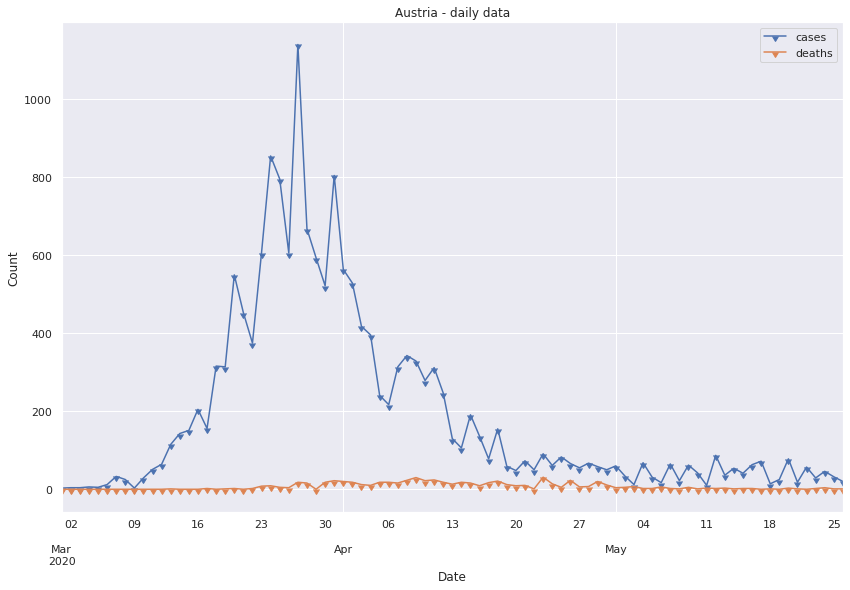

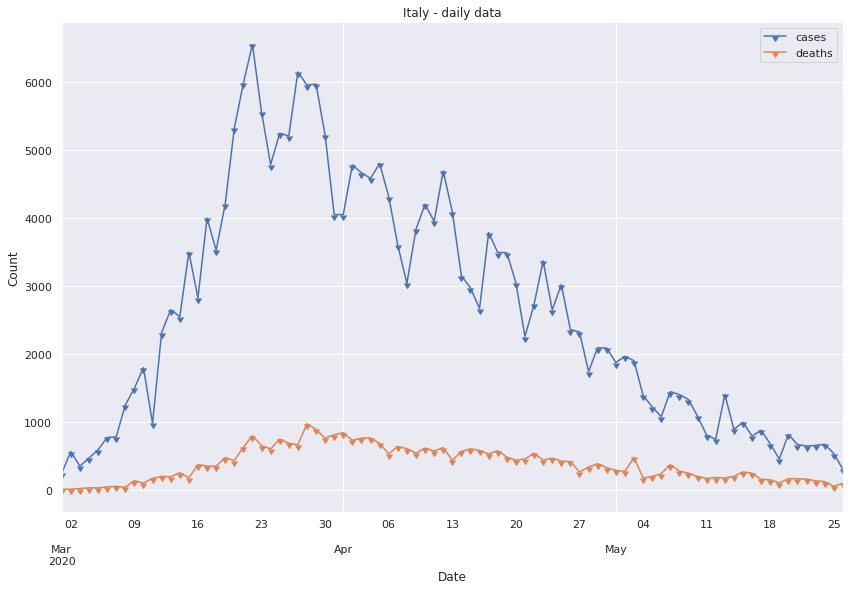

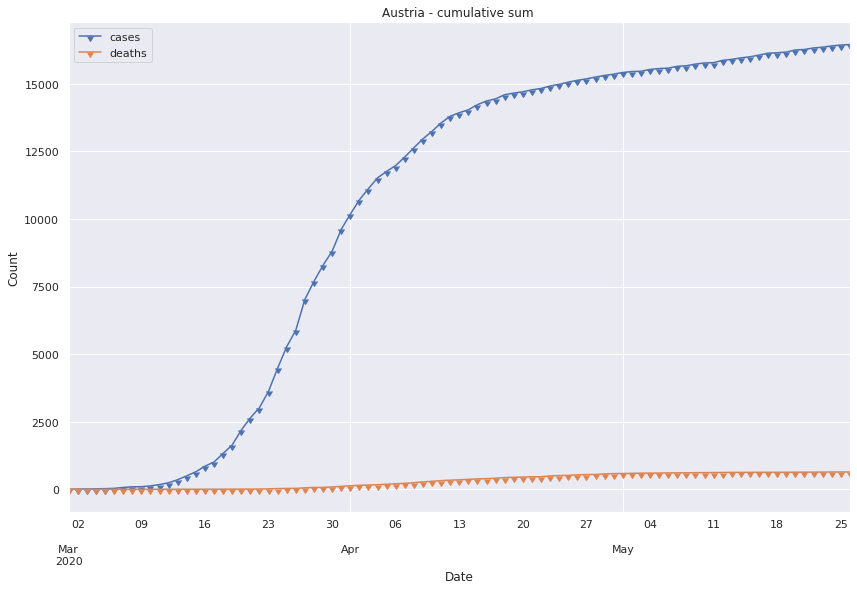

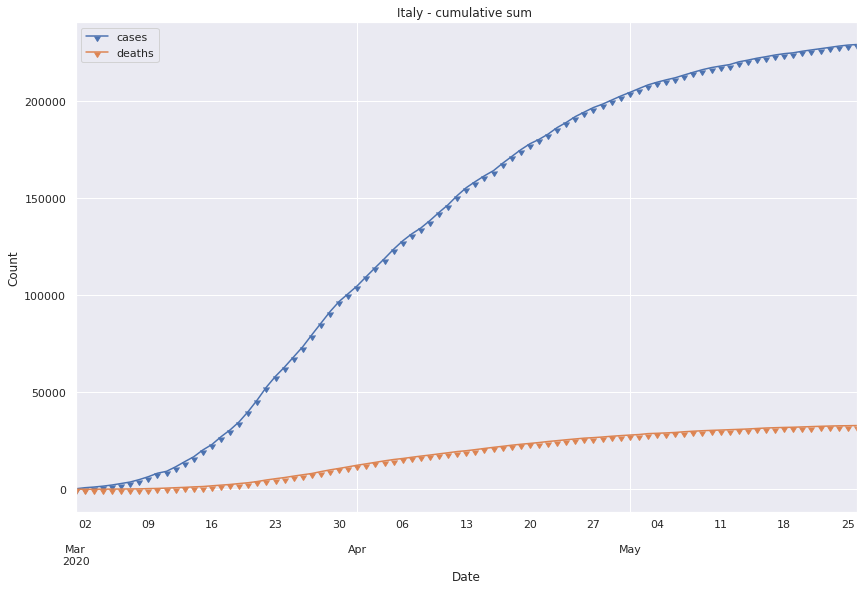

In [15]:
# ----------------------- Read file -----------------------

# TODO:
#  - choose date and fill in everywhere automatically
#  - Automatically show statistics


df_aut = df.loc[df['countriesAndTerritories']=='Austria']
df_it = df.loc[df['countriesAndTerritories']=='Italy']
df_aut = df_aut.sort_index(ascending=True)
df_it = df_it.sort_index(ascending=True)
df_aut_march = df_aut.loc['2020-03-01':'2020-05-26']
df_it_march = df_it.loc['2020-03-01':'2020-05-26']
    

# show some data
aut_cumsum_cases = df_aut.cumsum().loc[df_aut['month']>1]['cases']
aut_cumsum_deaths = df_aut.cumsum().loc[df_aut['month']>1]['deaths']
# print("Cases in Austria: ", aut_cumsum_cases)
# print("Deaths in Austria: ", aut_cumsum_deaths)


# Plots
ax = df_aut_march.plot(y=['cases','deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Austria - daily data")

ax = df_it_march.plot(y=['cases','deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Italy - daily data")

ax = df_aut_march.cumsum().plot(y=['cases','deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Austria - cumulative sum ")

ax = df_it_march.cumsum().plot(y=['cases','deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Italy - cumulative sum ")

Text(0.5, 1.0, 'Sweden - cumulative sum ')

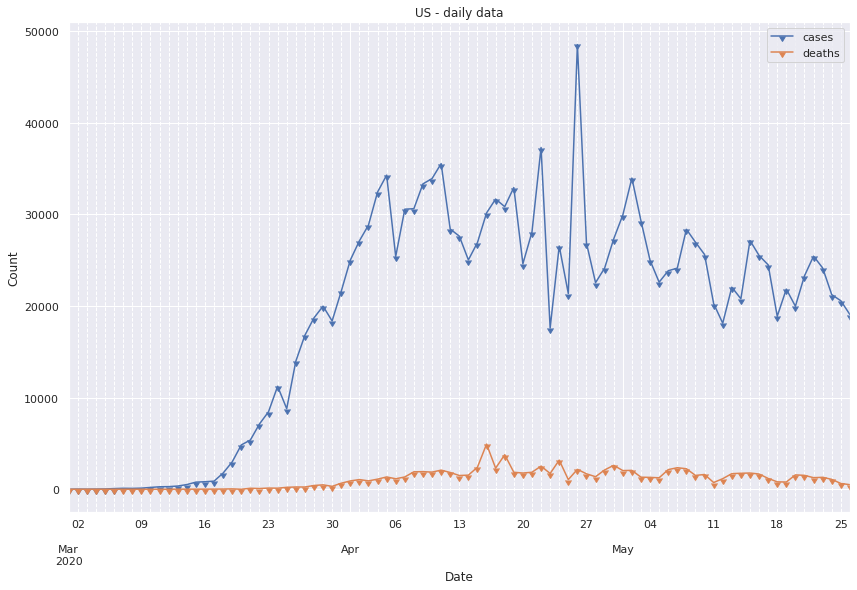

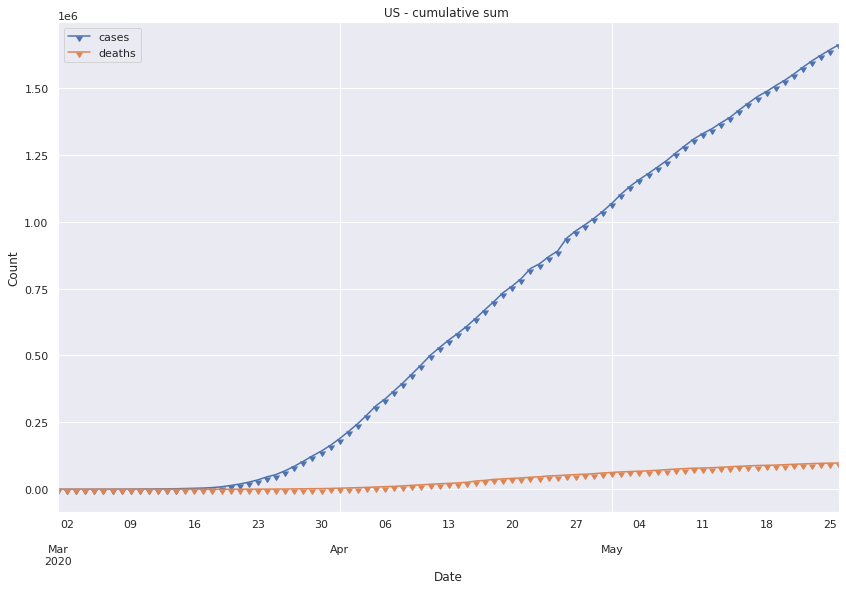

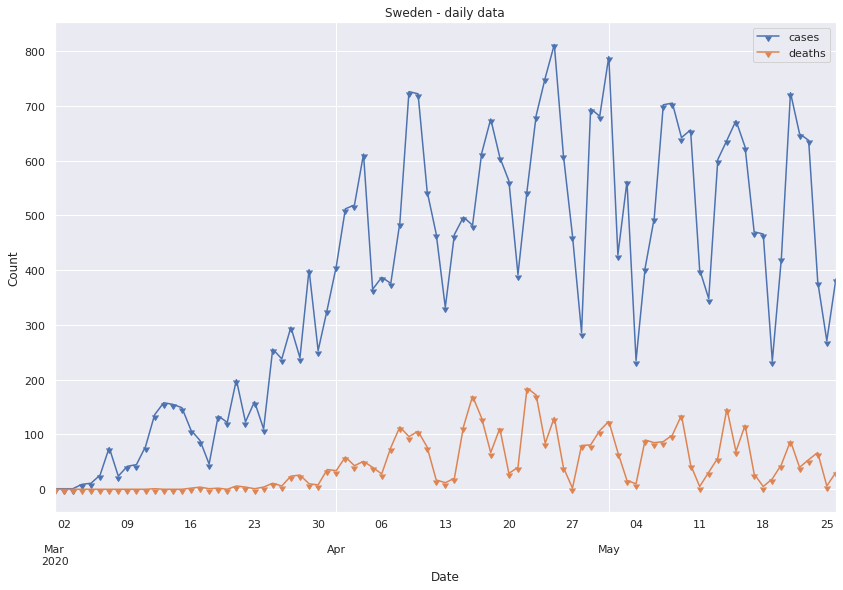

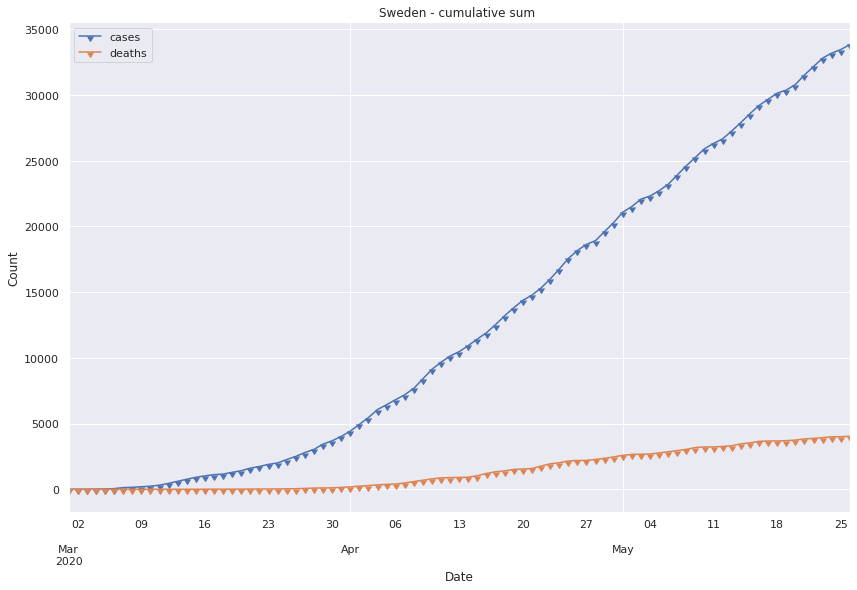

In [16]:
#  USA-Data
df_usa = df.loc[df['countriesAndTerritories']=='United_States_of_America']
df_usa = df_usa.sort_index(ascending=True)
df_usa_all = df_usa.loc['2020-03-01' :'2020-05-26']

# Plot USA
ax = df_usa_all.plot(y=['cases','deaths'], grid=True, marker=11, figsize=(14,9))
ax.grid(True)
ax.grid(which='minor', axis='both', linestyle='--')
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("US - daily data")

ax = df_usa_all.cumsum().plot(y=['cases','deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("US - cumulative sum ")


# Sweden-Data
df_swe = df.loc[df['countriesAndTerritories']=='Sweden']
df_swe = df_swe.sort_index(ascending=True)
df_swe_all = df_swe.loc['2020-03-01' :'2020-05-26']

# Sweden Plot
ax = df_swe_all.plot(y=['cases','deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Sweden - daily data")

ax = df_swe_all.cumsum().plot(y=['cases','deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Sweden - cumulative sum ")


In [17]:
print(file_yesterday())

COVID-19-geographic-disbtribution-worldwide-2020-05-25.xlsx


In [18]:
cases = df_aut.loc[df_aut['month']>1]['cases']
for c in cases:
    print(c)

print()

print("Cum Sum: ")
cumsum= df_aut.loc[df_aut['month']>1]['cases'].cumsum()
print(type(cumsum))
print(cumsum[50])

count = 1;
for i in cumsum:
    count += 1
    print(i)
    

    
display("count: " + str(count))


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
3
2
3
4
4
6
5
12
33
25
3
29
51
64
115
143
151
205
156
316
314
550
453
375
607
855
796
606
1141
668
594
522
805
564
529
418
396
241
217
314
343
329
279
312
247
130
106
191
136
78
155
59
48
73
50
91
61
83
66
55
67
58
50
60
34
12
68
31
17
65
22
62
42
10
87
36
54
41
63
72
14
25
78
18
57
29
46
32
20

Cum Sum: 
<class 'pandas.core.series.Series'>
2649
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
5
7
10
14
18
24
29
41
74
99
102
131
182
246
361
504
655
860
1016
1332
1646
2196
2649
3024
3631
4486
5282
5888
7029
7697
8291
8813
9618
10182
10711
11129
11525
11766
11983
12297
12640
12969
13248
13560
13807
13937
14043
14234
14370
14448
14603
14662
14710
14783
14833
14924
14985
15068
15134
15189
15256
15314
15364
15424
15458
15470
15538
15569
15586
15651
15673
15735
15777
15787
15874
15910
15964
16005
16068
16140
16154
16179
16257
16275
16332
16361
16407
16439
16459


'count: 118'

In [19]:
#count = 0
# print(cumsum.size)
# print(cumsum[cumsum.size-1])
#print()

for i in range(0, cumsum.size, 1):
    a = cumsum[i-1]
    b = cumsum[i]
    relativeGrowth = (b-a)/a*100
    print(a, b, relativeGrowth)


16459 0 -100.0
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 0 nan
0 2 inf
2 2 0.0
2 5 150.0
5 7 40.0
7 10 42.857142857142854
10 14 40.0
14 18 28.57142857142857
18 24 33.33333333333333
24 29 20.833333333333336
29 41 41.37931034482759
41 74 80.48780487804879
74 99 33.78378378378378
99 102 3.0303030303030303
102 131 28.431372549019606
131 182 38.93129770992366
182 246 35.16483516483517
246 361 46.7479674796748
361 504 39.612188365650965
504 655 29.96031746031746
655 860 31.297709923664126
860 1016 18.13953488372093
1016 1332 31.10236220472441
1332 1646 23.573573573573572
1646 2196 33.41433778857837
2196 2649 20.62841530054645
2649 3024 14.156285390713478
3024 3631 20.072751322751323
3631 4486 23.547232167446985
4486 5282 17.744092732946946
5282 5888 11.472926921620598
5888 7029 19.378396739130434
7029 7697 9.503485559823588
7697 8291 7.717292

<ipython-input-19-b1853c76ade9>:9: RuntimeWarning: invalid value encountered in long_scalars
  relativeGrowth = (b-a)/a*100
<ipython-input-19-b1853c76ade9>:9: RuntimeWarning: divide by zero encountered in long_scalars
  relativeGrowth = (b-a)/a*100


Text(0.5, 1.0, 'Germany - cumulative sum ')

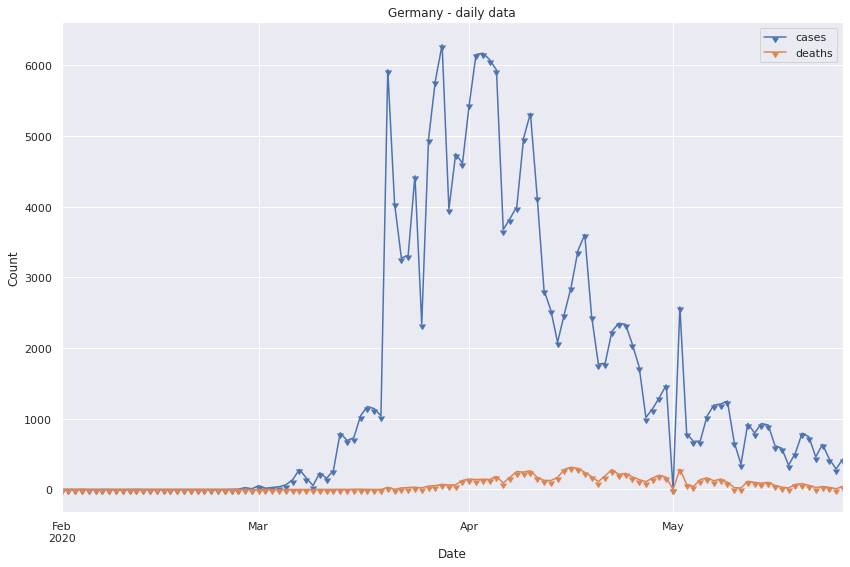

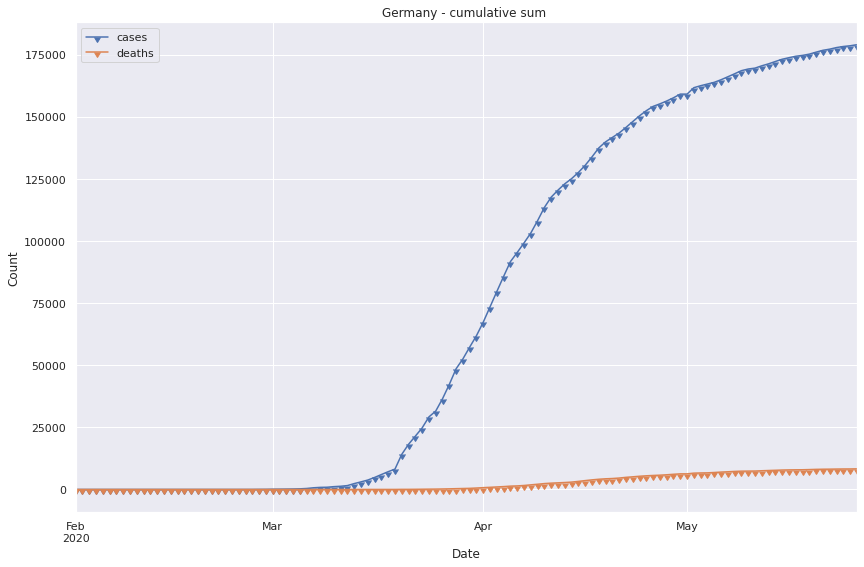

In [20]:
# Germany
df_ger = df.loc[df['countriesAndTerritories']=='Germany']
df_ger = df_ger.sort_index(ascending=True)
df_ger_today = df_ger.loc['2020-02-01':'2020-05-26']

ax = df_ger_today.plot(y=['cases','deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Germany - daily data")

ax = df_ger_today.cumsum().plot(y=['cases','deaths'], grid=True, marker=11, figsize=(14,9))
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.set_title("Germany - cumulative sum ")